# Housing Market Analysis - Surprise Housing

 - Business Goal : Model the price of houses with the available independent variables, which helps the management to understand how exactly the prices vary with the variables. So management can set the strategy of the firm and concentrate on areas that will yield high returns as well as understand the pricing dynamics of a new market.

#### Steps to build the regression model

* Read and Understand the data
* Cleanup the Data
* Prepare the data
* Train and Evaluate the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

## 1. Read and Understand the Data

In [2]:
#reading the dataset
housedata = pd.read_csv('train.csv')

In [3]:
housedata.shape

(1460, 81)

In [4]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
housedata.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Understand the Data

- To perform linear regression, the target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case using **pairwise plot**.

In [6]:
# Understand the categorial elements
catg_coln = housedata.columns[housedata.dtypes == object]
print(len(catg_coln))

43


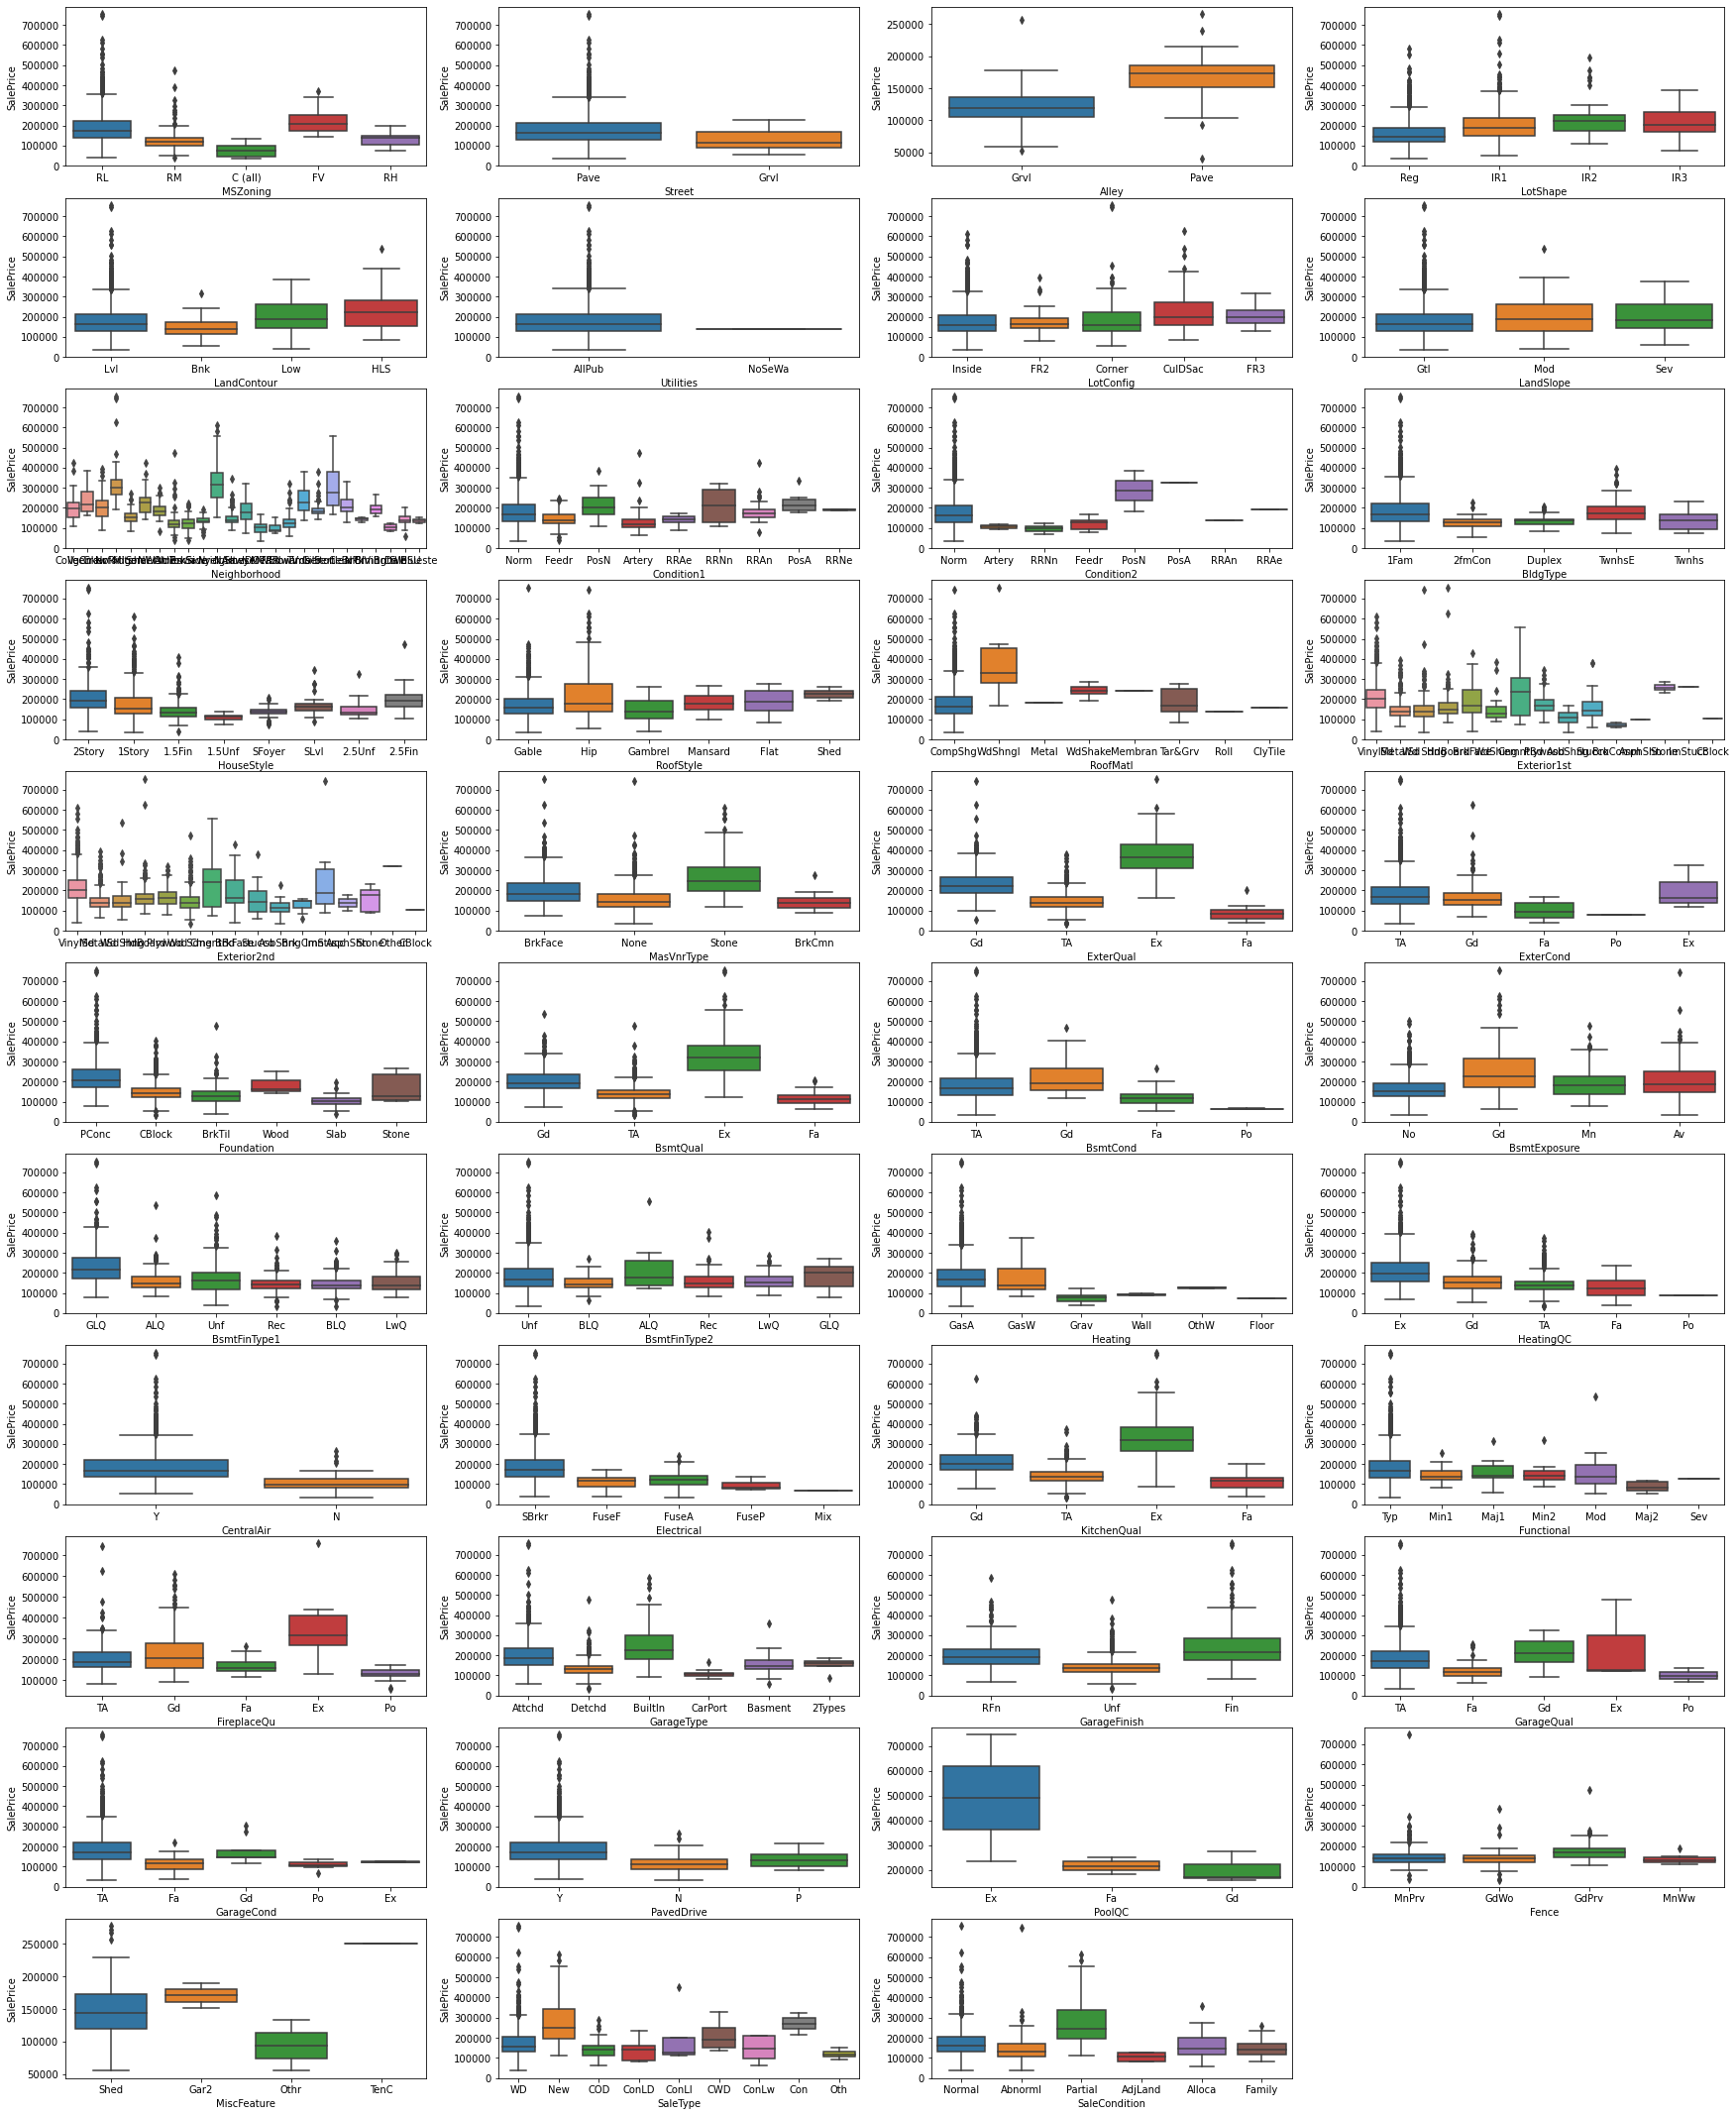

In [7]:
start = 0
end = len(catg_coln)
plt.figure(figsize=(30, 42))
for idx in range(start, end, 1):
    plt.subplot(12,4,idx + 1)
    sns.boxplot(x = catg_coln[idx], y = 'SalePrice', data = housedata)
plt.show()

In [8]:
#Understand the Numeric variables
house_numeric = housedata.select_dtypes(include=['float64', 'int64'])
house_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [9]:
# Drop the numeric varibles used for categorical representation and no need of 'Id' too.
catg_numeric = ['Id', 'MSSubClass', 'OverallQual', 'OverallCond']
house_numeric = house_numeric.drop(catg_numeric, axis = 1)

In [10]:
#sns.pairplot(house_numeric)
#plt.show()

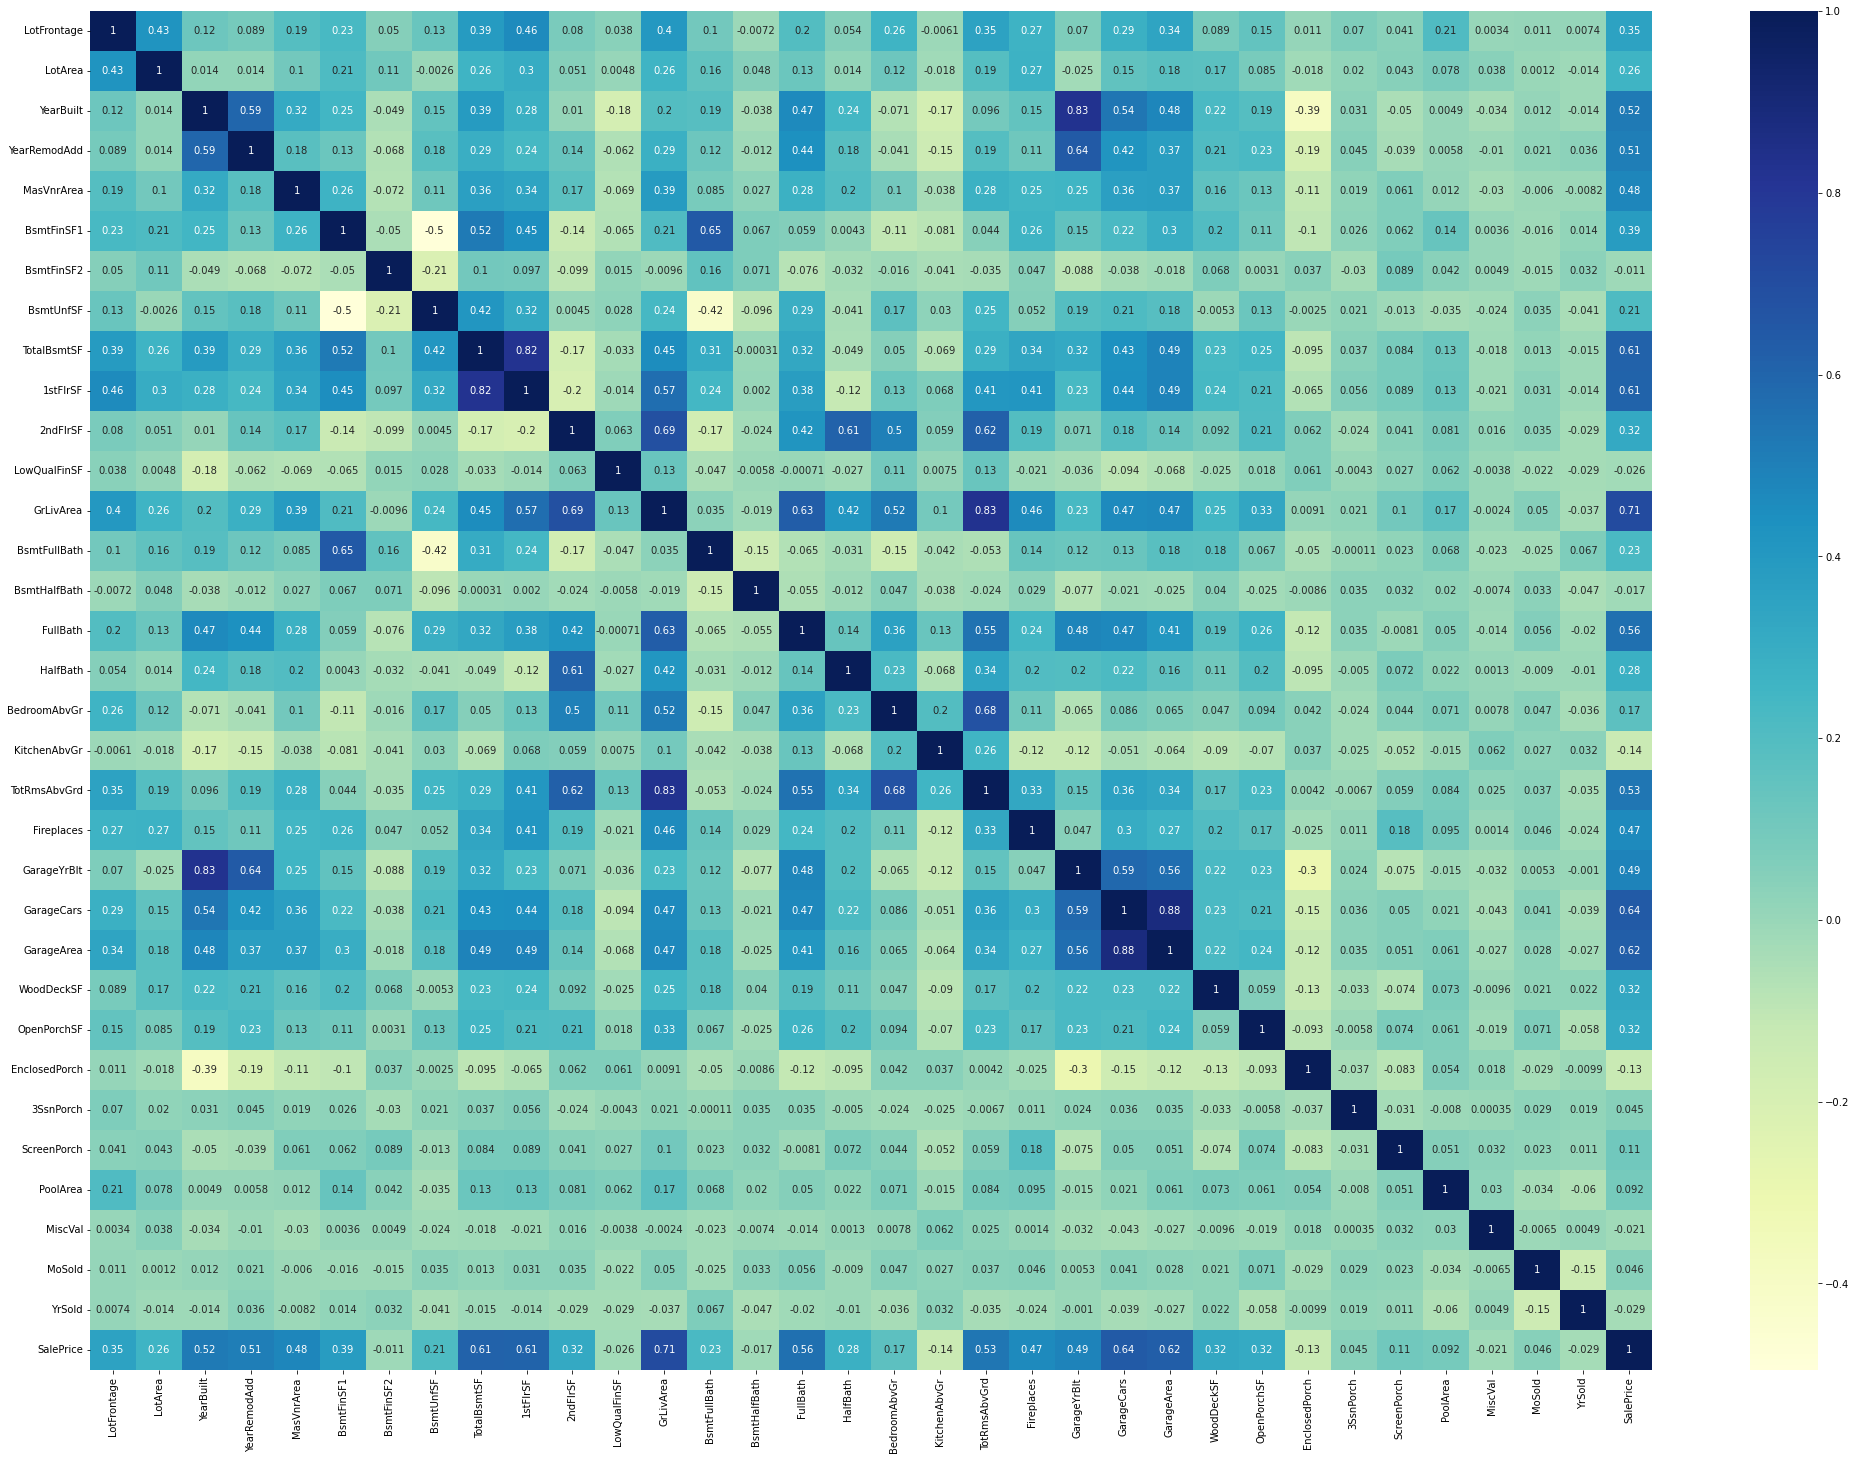

In [11]:
plt.figure(figsize = (35,25))
sns.heatmap(house_numeric.corr(), annot = True, cmap='YlGnBu')
plt.show()

The heatmap shows some useful insights:

Correlation of sales price with independent variables:
- Price is highly (positively) correlated with ```Ground Living Area (GrLivArea), Garage Area Size (GarageArea), Car Garage Size (GarageCars), Total Basement Area (TotalBsmtSF), Full bathrooms (FullBath), Total rooms (TotRmsAbvGrd), First Floor Area (1stFlrSF), Original Built date (YearBuilt)``` (notice how all of these variables represent the sale of the house).

- Price is negatively correlated to ```Kitchen (KitchenAbvGr), Porch Area (EnclosedPorch)``` (-0.10 approximately). This suggest that variables not having impact on sale  price of the house, may be new owners think to renovate these areas.)

Correlation among independent variables:

- Independent variables are highly correlated: ```Original built date (Year built), Total Rooms (TotRmsAbvGrd), First floor Area (1stFlrSF), Number of Bathrooms (FullBath), Ground Living area (GrLivArea), Garage Area Size (GarageArea), Garage Built date (GarageYrBlt), etc.``` are all interested for new home buyers and which has postively corelated.

## 2. Data Cleanup 

* Impute the variables and Drop the redudant columns

In [12]:
#find the elements which is having invalid data 
for col in housedata.columns:
    null_cnt = housedata[col].isnull().sum()
    if  null_cnt > 0:
        print("{0} : {1}".format(col, null_cnt))

LotFrontage : 259
Alley : 1369
MasVnrType : 8
MasVnrArea : 8
BsmtQual : 37
BsmtCond : 37
BsmtExposure : 38
BsmtFinType1 : 37
BsmtFinType2 : 38
Electrical : 1
FireplaceQu : 690
GarageType : 81
GarageYrBlt : 81
GarageFinish : 81
GarageQual : 81
GarageCond : 81
PoolQC : 1453
Fence : 1179
MiscFeature : 1406


In [13]:
# Modify and fix the columns where NA is used for valid represenation
housedata['Alley'].fillna('NoAlleyAccess', inplace=True)
housedata['BsmtQual'].fillna('Nb', inplace=True)
housedata['BsmtCond'].fillna('Nb', inplace=True)
housedata['BsmtExposure'].fillna('Nb', inplace=True)
housedata['BsmtFinType1'].fillna('NoBa', inplace=True)
housedata['BsmtFinType2'].fillna('NoBa', inplace=True)
housedata['FireplaceQu'].fillna('Nf', inplace=True)
housedata['GarageType'].fillna('NoGarage', inplace=True)
housedata['GarageFinish'].fillna('NoG', inplace=True)
housedata['GarageCond'].fillna('NG', inplace=True)
housedata['GarageQual'].fillna('NG', inplace=True)
housedata['PoolQC'].fillna('NoPoll', inplace=True)
housedata['Fence'].fillna('NoFence', inplace=True)

In [14]:
#Impute the Categorical variables
housedata['MasVnrType'].fillna(housedata['MasVnrType'].mode()[0], inplace=True)
housedata['Electrical'].fillna(housedata['Electrical'].mode()[0], inplace=True)

In [15]:
#Impute the Numeric values
housedata['MasVnrArea'].fillna(housedata['MasVnrArea'].mean(), inplace=True)
housedata['GarageYrBlt'].fillna(housedata['GarageYrBlt'].mean(), inplace=True)

In [16]:
# Drop the columns which has high number of invalid data
housedata = housedata.drop('LotFrontage', axis = 1)
housedata = housedata.drop('MiscFeature', axis = 1)
housedata = housedata.drop('MiscVal', axis = 1)
housedata = housedata.drop('Id', axis = 1)

In [17]:
housedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   Alley          1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [18]:
housedata.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,42.300571,9981.264932,1.382997,1.112799,30.202904,20.645407,180.569112,456.098091,161.319273,441.866955,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


## 3. Prepare the Data

* Create dummy variable for categorial elements

In [19]:
X = housedata
y = housedata['SalePrice']
X = X.drop('SalePrice', axis = 1)
X.head()

,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,8450,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NoPoll,NoFence,2,2008,WD,Normal
1,20,RL,9600,Pave,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NoPoll,NoFence,5,2007,WD,Normal
2,60,RL,11250,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,NoPoll,NoFence,9,2008,WD,Normal
3,70,RL,9550,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,NoPoll,NoFence,2,2006,WD,Abnorml
4,60,RL,14260,Pave,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,NoPoll,NoFence,12,2008,WD,Normal


In [20]:
housedata_catg = X.select_dtypes(include=['object'])
housedata_catg.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,SaleType,SaleCondition
0,RL,Pave,NoAlleyAccess,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Nf,Attchd,RFn,TA,TA,Y,NoPoll,NoFence,WD,Normal
1,RL,Pave,NoAlleyAccess,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,TA,Attchd,RFn,TA,TA,Y,NoPoll,NoFence,WD,Normal
2,RL,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,TA,Attchd,RFn,TA,TA,Y,NoPoll,NoFence,WD,Normal
3,RL,Pave,NoAlleyAccess,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Gd,Detchd,Unf,TA,TA,Y,NoPoll,NoFence,WD,Abnorml
4,RL,Pave,NoAlleyAccess,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,TA,Attchd,RFn,TA,TA,Y,NoPoll,NoFence,WD,Normal


In [21]:
# Create dummy variables for categorical elements
housedata_dummies = pd.get_dummies(housedata_catg, drop_first = True)
housedata_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NoAlleyAccess,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [22]:
# Drop the columns for which dummy variable is created
X = X.drop(list(housedata_catg.columns), axis=1)

In [23]:
X = pd.concat([X, housedata_dummies], axis=1)

In [24]:
X.shape

(1460, 253)

In [25]:
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=253)

#### Split the dataset

- Split the data and use MinMax Scaling for normalizing the numeric variables (between 0 and 1).

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)
print (X_train.shape)
print (X_test.shape)

(1021, 253)
(438, 253)


### 4. Train and Evaluate the model

In [27]:
# Create the instance
linreg = LinearRegression()

# Fit a line
linreg.fit(X_train, y_train)

LinearRegression()

In [28]:
print(linreg.intercept_)
print(linreg.coef_)

164430557554410.62
[-1.08106163e+03  7.72217981e+03  9.22446914e+03  5.82462030e+03
  1.12271451e+04  3.12902547e+03  4.42577015e+03  2.71534628e+16
  9.60402368e+15  2.63062226e+16 -2.61179973e+16 -6.91447217e+15
 -7.80770682e+15 -8.69667892e+14  9.39869305e+15  1.04025000e+03
  6.40000000e+01  3.44000000e+02 -1.59050000e+03 -2.79750000e+03
 -3.84400000e+03 -7.05500000e+02  1.16100000e+03 -1.56375000e+02
  3.06425000e+03  2.73203125e+03  1.35650000e+03  1.59900000e+03
  9.18875000e+02  7.31875000e+02  9.06687500e+02  2.44184125e+05
 -8.39500000e+02 -1.06607422e+03  5.84950000e+03  2.69850000e+03
  1.10160000e+04  7.62200000e+03  2.19387500e+03  8.19000000e+02
 -6.70250000e+02 -1.67125000e+02  3.28750000e+02  9.88000000e+02
  1.39781250e+02 -1.75334375e+03  9.29625000e+02 -3.63437500e+02
  2.17000000e+03 -1.37653125e+03  1.14687500e+01 -2.95500000e+02
  8.21000000e+02 -3.19662500e+03  8.43562500e+02  5.42812500e+02
  1.38962500e+03 -4.52125000e+02 -5.69218750e+02  4.40218750e+03
 -1.91

In [29]:
# Predict and calcluate the R2, Mean square error
y_pred_train = linreg.predict(X_train)
y_pred_test = linreg.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rss_train = np.sum(np.square(y_train, y_pred_train))
rss_test = np.sum(np.square(y_test, y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

metrics_linreg = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

print(r2_train)
print(r2_test)
print(rss_train)
print(rss_test)
print(mse_train)
print(mse_test)

0.9529318014282797
-1.0453414654905464e+22
39623516550750.0
17301027658488.0
3.375151997173688e+21
3.3537303770405745e+21


## Ridge and Lassio Regression

- We need to use ridge and lasso regression to find the critical variables which is impacting the price of house.

### Ridge Regression

In [30]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

model_cv = GridSearchCV(estimator=ridge,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [31]:
print(model_cv.best_params_)

{'alpha': 100}


In [32]:
alpha = 100
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-3.29992664e+03  4.60174224e+03  1.04073606e+04  4.79078183e+03
  4.47283202e+03  3.12556472e+03  4.51767754e+03  5.34111570e+03
  1.37498037e+03  9.20941272e+02  6.98604929e+03  7.50270026e+03
  9.44100446e+03 -1.56329363e+03  1.32178230e+04  2.22537687e+03
 -1.78278858e+02  3.24737125e+03  1.03428076e+03 -1.65244299e+03
 -2.75885319e+03  2.98705546e+03  2.82591993e+03  9.45878688e+02
  4.28524801e+03  2.59479381e+03  1.42632475e+03  1.48949420e+03
 -3.79690688e+02  8.70655434e+02  8.95321059e+02  3.28048250e+03
 -5.05372469e+02 -5.85162628e+02  1.05520746e+03  3.21747667e+02
  1.91888669e+03  3.79981329e+02  1.46917710e+03  5.43152141e+02
  6.25650837e+01  9.67267416e+01 -5.84241467e+02  2.67856183e+02
  1.34620030e+03 -3.91179507e+02  1.72064291e+03 -6.42755253e+02
  2.30460006e+03 -1.54789729e+03 -4.41162438e+02 -4.60976224e+02
  6.94354532e+02 -1.03661777e+03  1.88095116e+02 -2.67253847e+02
  1.56049475e+02 -2.16597577e+02 -7.42505153e+02  3.79542838e+03
 -2.82541141e+03 -1.17286

In [33]:
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rss_train = np.sum(np.square(y_train, y_pred_train))
rss_test = np.sum(np.square(y_test, y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

metrics_ridge = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

print(r2_train)
print(r2_test)
print(rss_train)
print(rss_test)
print(mse_train)
print(mse_test)

0.938117515490301
0.7196287957440599
39623516550750.0
17301027658488.0
3.375151997173688e+21
3.3537303770405745e+21


### Lasso Regression

In [34]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso = Lasso()

model_cv = GridSearchCV(estimator=lasso,
                        param_grid = params,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score = True,
                        verbose = 1)

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [35]:
print(model_cv.best_params_)

{'alpha': 500}


In [36]:
alpha = 500
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
print(lasso.coef_)

[-4.19804625e+03  3.93814540e+03  1.17611831e+04  5.60257349e+03
  8.74997820e+03  3.02124252e+03  3.71204647e+03  6.29084521e+03
  0.00000000e+00 -0.00000000e+00  9.87812594e+03  0.00000000e+00
  1.80478581e+03 -2.39225236e+03  3.15916339e+04  1.60312199e+03
 -0.00000000e+00  5.98815853e+02 -0.00000000e+00 -2.35509741e+03
 -3.36807702e+03  0.00000000e+00  1.17648191e+03  1.40901912e+03
  2.47693252e+03  1.93471509e+03  5.96045748e+02  8.29066355e+02
 -5.53135906e+01  2.62674516e+02  0.00000000e+00  3.70556735e+03
 -1.74620430e+02 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  1.05011762e+03 -3.57705971e+02  9.53229004e+02  1.21949472e+02
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  1.24820010e+02 -1.84162724e+02
  1.60390959e+03 -5.20655814e+02 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -1.35218470e+02  0.00000000e+00 -0.00000000e+00
  5.62724597e+02  0.00000000e+00  0.00000000e+00  3.80861162e+03
 -1.07954034e+03 -0.00000

In [37]:
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rss_train = np.sum(np.square(y_train, y_pred_train))
rss_test = np.sum(np.square(y_test, y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

metrics_lasso = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

print(r2_train)
print(r2_test)
print(rss_train)
print(rss_test)
print(mse_train)
print(mse_test)

0.9386063240109557
0.5535860231150109
39623516550750.0
17301027658488.0
3.375151997173688e+21
3.3537303770405745e+21


In [38]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metrics_linreg
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metrics_ridge, name = 'Ridge Regression')
ls_metric = pd.Series(metrics_lasso, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.529318e-01,9.381175e-01,9.386063e-01
1,R2 Score (Test),-1.045341e+22,7.196288e-01,5.535860e-01
2,RSS (Train),3.962352e+13,3.962352e+13,3.962352e+13
3,RSS (Test),1.730103e+13,1.730103e+13,1.730103e+13
4,MSE (Train),5.809606e+10,5.809606e+10,5.809606e+10
5,MSE (Test),5.791140e+10,5.791140e+10,5.791140e+10


### List the coefficients (beta) value got from the Regression method

In [39]:
betas = pd.DataFrame(index = X.columns)

betas.rows = X.columns

In [40]:
betas['linreg'] = linreg.coef_
betas['ridge'] = ridge.coef_
betas['lasso'] = lasso.coef_

In [41]:
pd.set_option('display.max_rows', None)
betas.head(X.shape[1])

,linreg,ridge,lasso
MSSubClass,-1.081062e+03,-3299.926636,-4198.046253
LotArea,7.722180e+03,4601.742242,3938.145403
OverallQual,9.224469e+03,10407.360554,11761.183103
OverallCond,5.824620e+03,4790.781829,5602.573494
YearBuilt,1.122715e+04,4472.832016,8749.978199
YearRemodAdd,3.129025e+03,3125.564722,3021.242516
MasVnrArea,4.425770e+03,4517.677537,3712.046471
BsmtFinSF1,2.715346e+16,5341.115699,6290.845207
BsmtFinSF2,9.604024e+15,1374.980368,0.000000
BsmtUnfSF,2.630622e+16,920.941272,-0.000000


In [42]:
betas.ridge.sort_values(ascending=False).head(15)

GrLivArea               13217.822965
OverallQual             10407.360554
2ndFlrSF                 9441.004458
1stFlrSF                 7502.700263
TotalBsmtSF              6986.049294
Neighborhood_NoRidge     5986.031426
RoofMatl_WdShngl         5862.304274
BsmtFinSF1               5341.115699
Neighborhood_NridgHt     4948.639890
OverallCond              4790.781829
BsmtExposure_Gd          4723.638506
LotArea                  4601.742242
MasVnrArea               4517.677537
YearBuilt                4472.832016
GarageCars               4285.248014
Name: ridge, dtype: float64

In [43]:
betas.lasso.sort_values(ascending=False).head(15)

GrLivArea               31591.633859
OverallQual             11761.183103
TotalBsmtSF              9878.125943
YearBuilt                8749.978199
BsmtFinSF1               6290.845207
OverallCond              5602.573494
Neighborhood_NoRidge     5248.468276
BsmtExposure_Gd          5234.399129
Neighborhood_NridgHt     4338.654205
SaleType_New             4115.266876
LotArea                  3938.145403
RoofMatl_WdShngl         3858.117428
Neighborhood_Crawfor     3808.611624
MasVnrArea               3712.046471
PoolArea                 3705.567351
Name: lasso, dtype: float64

## Insights

- We analysed the factors affecting the sale price of houses on new market using Linear regresssion, Ridge and Lasso regression models. We evaluated the model based on R2, RSS & RSME metric.

- From Ridge model, we can predict the results with approx 72% variance on the unseen data. 

- We identified the few variables which has high impact on setting the sale price of the house.

    - > Ground living area (GrLivArea)
    - > Overall condition, material & finish of the house (OverallQual, OverallCond)
    - > First floor and Second floor (1stFlrSF, 2ndFlrSF)
    - > Total basement area (TotalBsmtSF)
    - > North ridge and North ridge heights neighborhood (Neighborhood_NoRidge, Neighborhood_NridgHt)
    - > Wood shingle roofs (RoofMatl_WdShngl)
    - > Basement Type-1 finish (BsmtFinSF1)
    - > Good exposure to walkout and green level walls (BsmtExposure_Gd)
    - > Lot size (LotArea)
    - > Masonry veneer area (MasVnrArea)
    - > Original construction date (YearBuilt)
    - > Size of garage in car capacity (GarageCars)

#### _**These variables helps management to understand the market dynamics and derive new strategies to set the sale price of the house.**_

>

### Part II (Problem Statement Analysis)

Question 1: What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose double the value of 
alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?

In [44]:
alpha = 200
ridge = Ridge(alpha = alpha)

ridge.fit(X_train, y_train)
#print(ridge.coef_)

y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rss_train = np.sum(np.square(y_train, y_pred_train))
rss_test = np.sum(np.square(y_test, y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

metrics_ridge = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

#print(r2_train)
#print(r2_test)
#print(rss_train)
#print(rss_test)
#print(mse_train)
#print(mse_test)

betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns
betas['ridge'] = ridge.coef_
betas.ridge.sort_values(ascending=False).head(15)

GrLivArea               11082.990360
OverallQual              9943.869274
2ndFlrSF                 7304.558520
1stFlrSF                 6962.344804
Neighborhood_NoRidge     6148.458641
TotalBsmtSF              5943.655932
RoofMatl_WdShngl         5522.601792
Neighborhood_NridgHt     5316.098368
BsmtExposure_Gd          4702.562110
BsmtFinSF1               4430.545789
MasVnrArea               4426.829995
GarageCars               4290.034273
OverallCond              4026.469647
LotArea                  3872.535551
TotRmsAbvGrd             3791.926966
Name: ridge, dtype: float64

In [45]:
alpha = 1000
lasso = Lasso(alpha = alpha)

lasso.fit(X_train, y_train)
#print(lasso.coef_)

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

rss_train = np.sum(np.square(y_train, y_pred_train))
rss_test = np.sum(np.square(y_test, y_pred_test))

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

metrics_lasso = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

#print(r2_train)
#print(r2_test)
#print(rss_train)
#print(rss_test)
#print(mse_train)
#print(mse_test)

betas = pd.DataFrame(index = X.columns)
betas.rows = X.columns
betas['lasso'] = lasso.coef_
betas.lasso.sort_values(ascending=False).head(15)

GrLivArea               32412.523751
OverallQual             14402.018721
TotalBsmtSF              8370.498452
YearBuilt                8178.552997
BsmtFinSF1               6543.136707
Neighborhood_NoRidge     5294.578138
BsmtExposure_Gd          5009.911528
Neighborhood_NridgHt     4972.848569
OverallCond              4528.473831
SaleType_New             4302.327337
RoofMatl_WdShngl         3643.484905
YearRemodAdd             3505.191244
LotArea                  3372.540183
Neighborhood_Crawfor     3139.004788
MasVnrArea               2988.643650
Name: lasso, dtype: float64

- The optimal value for alpha = 100 in Ridge regression, now we double the alpha values i.e. alpha = 200 on ridge and find the important predictor variables below.
    - _GrLivArea, OverallQual, 2ndFlrSF, 1stFlrSF, Neighborhood_NoRidge, TotalBsmtSF, RoofMatl_WdShngl, Neighborhood_NridgHt, BsmtExposure_Gd, BsmtFinSF1, MasVnrArea, GarageCars, OverallCond, LotArea, TotRmsAbvGrd_

>

- The optimal value for alpha = 500 in Lasso regression, now we double the alpha values i.e. alpha = 1000 on lasso and find the important predictor variables below.
    - _GrLivArea, OverallQual, TotalBsmtSF, YearBuilt, BsmtFinSF1, Neighborhood_NoRidge, BsmtExposure_Gd, Neighborhood_NridgHt, OverallCond, SaleType_New, RoofMatl_WdShngl, YearRemodAdd, LotArea, Neighborhood_Crawfor, MasVnrArea_

> 

Question 2: You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?

- Generally after determined the optimal value of lambda, we need to build both ridge and lasso regression. We can choose the Lasso regression when both the performance is same, since Lasso does automatic feature selection (and keep the number of preidctor variables as less as possible.

- In House market analysis, I have determined the optimal value of lambda in both cases i.e. lambda = 100 in Ridge and lambda = 500 in Lasso. But in this scenario, based on this model build result, I choose lambda = 100 in Ridge, because Ridge regression gives better preidctive result on unseen data (test data) than Lasso though automatic feature selection is not applied. 

> 

Question 3: After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?

In [52]:
#Dropping the fiive most important predictor variables in Lasso model

X_train2 = X_train
X_test2 = X_test

y_train2 = y_train
y_test2 = y_test

X_train2 = X_train2.drop('GrLivArea', axis = 1)
X_train2 = X_train2.drop('OverallQual', axis = 1)
X_train2 = X_train2.drop('TotalBsmtSF', axis = 1)
X_train2 = X_train2.drop('YearBuilt', axis = 1)
X_train2 = X_train2.drop('BsmtFinSF1', axis = 1)

X_test2 = X_test2.drop('GrLivArea', axis = 1)
X_test2 = X_test2.drop('OverallQual', axis = 1)
X_test2 = X_test2.drop('TotalBsmtSF', axis = 1)
X_test2 = X_test2.drop('YearBuilt', axis = 1)
X_test2 = X_test2.drop('BsmtFinSF1', axis = 1)

print(X_train.shape, X_train2.shape)

(1021, 253) (1021, 248)


In [53]:
params2 = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 
                    1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

lasso2 = Lasso()

model_cv2 = GridSearchCV(estimator=lasso2,
                        param_grid = params2,
                        scoring = 'neg_mean_absolute_error',
                        cv = 5,
                        return_train_score = True,
                        verbose = 1)

model_cv2.fit(X_train2, y_train2)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [54]:
print(model_cv2.best_params_)

{'alpha': 500}


In [55]:
alpha = 500
lasso2 = Lasso(alpha = alpha)

lasso2.fit(X_train2, y_train2)
print(lasso2.coef_)

y_pred_train2 = lasso2.predict(X_train2)
y_pred_test2 = lasso2.predict(X_test2)

r2_train = r2_score(y_train2, y_pred_train2)
r2_test = r2_score(y_test2, y_pred_test2)

rss_train = np.sum(np.square(y_train2, y_pred_train2))
rss_test = np.sum(np.square(y_test2, y_pred_test2))

mse_train = mean_squared_error(y_train2, y_pred_train2)
mse_test = mean_squared_error(y_test2, y_pred_test2)

metrics_lasso2 = [r2_train, r2_test, rss_train, rss_test, (mse_train**0.5), (mse_test**0.5)]

print(r2_train)
print(r2_test)
print(rss_train)
print(rss_test)
print(mse_train)
print(mse_test)

[-5.38358321e+03  4.13495470e+03  5.09259071e+03  3.68031387e+03
  5.04053498e+03  0.00000000e+00 -0.00000000e+00  3.12425022e+04
  2.83202758e+04 -0.00000000e+00  3.53653614e+03  0.00000000e+00
  1.67837599e+03  0.00000000e+00 -1.83653831e+03 -4.40756918e+03
  0.00000000e+00  2.32967194e+03  2.69101488e+03  3.48491644e+03
  2.46705598e+03  5.70193045e+02  1.10489087e+03 -9.15959838e+02
  2.45719543e+02  1.40993640e+02  5.33146177e+03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  1.33254217e+03
 -0.00000000e+00  7.61817852e+02  8.78825466e+02  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  1.18570225e+02
 -0.00000000e+00  2.34475518e+02 -5.28034372e+02  2.05744173e+03
 -5.95886263e+02 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -4.58518412e+02  0.00000000e+00  5.09519122e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00  3.56232770e+03 -2.23344868e+03
 -0.00000000e+00 -5.38325752e+02 -6.19087148e+02 -8.71202531e+02
 -1.07717894e+03  9.79122

In [58]:
betas2 = pd.DataFrame(index = X_train2.columns)

betas2.rows = X_train2.columns
betas2['lasso2'] = lasso2.coef_
betas2.lasso2.sort_values(ascending=False).head(15)

1stFlrSF                31242.502166
2ndFlrSF                28320.275811
BsmtExposure_Gd          6803.515937
Neighborhood_NoRidge     5880.242320
Neighborhood_NridgHt     5660.094148
PoolArea                 5331.461768
OverallCond              5092.590710
MasVnrArea               5040.534979
RoofMatl_WdShngl         4513.067380
Neighborhood_Somerst     4436.054027
Functional_Typ           4243.719829
SaleType_New             4217.529102
LotArea                  4134.954699
Neighborhood_StoneBr     3694.322618
BsmtFinType1_GLQ         3690.465376
Name: lasso2, dtype: float64

- After dropping the five most important predictor variables in the lasso model, We created another model excluding the five most important predictor variables. Here is the  five most important predictor variables from new model.

    - 1stFlrSF
    - 2ndFlrSF
    - BsmtExposure_Gd
    - Neighborhood_NoRidge
    - Neighborhood_NridgHt

> 

Question 4: How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?

Model has to be build for roubst and generisable, 
   - For generalisable, the dataset does not have more noisy or outlier elements in the dataset. We can split the dataset to training, validation and test, the training & validation datas are used for developing the model and Test data is kept apart (unseen) to check the performance of this model. This method checks the generaliability of the model.
   - When not much weightage is given to outliers in the data, we can build accuracy of the model high. So outlier analysis need to perform to remove the outlier data from dataset, this helps to build the model accuracy.